In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os 

In [25]:
df=pd.read_csv(f"{Path(os.getcwd()).parent}/data/raw/data.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
print(df.shape)
df.info()

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [27]:
df.drop_duplicates(inplace=True)
df["total_bedrooms"].fillna(df["total_bedrooms"].mode()[0],inplace=True)

C:\Users\ShivaSai\AppData\Local\Temp\ipykernel_20484\1389800251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].mode()[0],inplace=True)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
Stat=df.describe()
Stat


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [30]:
def Stats_fn(Stats:pd.DataFrame)->pd.DataFrame:
    """ always pass df.describe"""
    IQR=Stats.iloc[6]-Stats.iloc[4]
    return pd.DataFrame({"skewness":df.drop("ocean_proximity",axis=1,inplace=False).skew().abs()>1,
        "IQR/std":(IQR/Stats.loc["std"]).between(1,3,inclusive="neither"),
        "outliers":(Stats.iloc[7]-Stats.iloc[3])/Stats.iloc[2]>6,
        "long right tail":(Stats.loc["max"]/Stats.loc["mean"])>2,
        "long left tail":(Stats.loc["min"]/Stats.loc["mean"])>2,
        "max outliers":(Stats.iloc[6]+1.5*IQR)<Stats.loc["max"],
        "min outliers":Stats.iloc[4]-1.5*(IQR)>Stats.loc["min"]})
Stats_fn(Stat)

,skewness,IQR/std,outliers,long right tail,long left tail,max outliers,min outliers
longitude,False,True,False,False,False,False,False
latitude,False,True,False,False,False,False,False
housing_median_age,False,True,False,False,False,False,False
total_rooms,True,False,True,True,False,True,False
total_bedrooms,True,False,True,True,False,True,False
population,True,False,True,True,False,True,False
households,True,False,True,True,False,True,False
median_income,True,True,True,True,False,True,False
median_house_value,False,True,False,True,False,True,False


    solutions:
        skewness-log transform
        iqr/std-Scaling 
        long right tail-log tranform
        long left tail-reverse log transform
        everything else-cap (for small datasets)
        ** Note:Scaling should be done only after splitting train and test data**

In [31]:
for cols in ["total_rooms","total_bedrooms","population","households","median_income","median_house_value"]:
    q1=df[cols].quantile(0.25)
    q3=df[cols].quantile(0.75)
    iqr=q3-q1
    lower_cap=q1-1.5*iqr
    upper_cap=q3+1.5*iqr
    df[cols]=df[cols].clip(lower=lower_cap,upper=upper_cap)


In [ ]:
Stats_fn(Stats=df.describe())

,skewness,IQR/std,outliers,long right tail,long left tail,max outliers,min outliers
longitude,False,True,False,False,False,False,False
latitude,False,True,False,False,False,False,False
housing_median_age,False,True,False,False,False,False,False
total_rooms,False,True,False,True,False,False,False
total_bedrooms,False,True,False,True,False,False,False
population,False,True,False,True,False,False,False
households,False,True,False,True,False,False,False
median_income,False,True,False,True,False,False,False
median_house_value,False,True,False,True,False,False,False


In [33]:
for cols in ["total_rooms","total_bedrooms","population","households","median_income","median_house_value"]:
    df[cols]=np.log(df[cols]+1)

In [34]:
Stats_fn(df.describe())

,skewness,IQR/std,outliers,long right tail,long left tail,max outliers,min outliers
longitude,False,True,False,False,False,False,False
latitude,False,True,False,False,False,False,False
housing_median_age,False,True,False,False,False,False,False
total_rooms,True,True,True,False,False,False,True
total_bedrooms,True,True,True,False,False,False,True
population,True,True,True,False,False,False,True
households,True,True,True,False,False,False,True
median_income,False,True,False,False,False,False,True
median_house_value,False,True,True,False,False,False,True


    the log tranformation will compress the large values and expand the small values:
        hence we are able to see new min outliers and skewness
        what should we do abbout it ?
        NOTHING
            1.as min values expand we will see the new min outliers
            2.as we reduce right or left skewness, we will see increase in mild skewness

In [35]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
encoded_array=encoder.fit_transform(df[["ocean_proximity"]])
encoded_df=pd.DataFrame(encoded_array,columns=encoder.get_feature_names_out(["ocean_proximity"]))
df.drop("ocean_proximity",axis=1,inplace=True)
df=pd.concat([df.reset_index(drop=True),encoded_df.reset_index(drop=True)],axis=1)

In [36]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.198671,13.022766,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,8.648112,7.009409,7.784057,6.997139,2.198671,12.789687,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,12.771673,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,12.740520,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,12.743154,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,0.940124,11.265758,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,1.268861,11.252872,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,0.993252,11.432810,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.053336,11.346883,0.0,1.0,0.0,0.0,0.0


<Axes: >

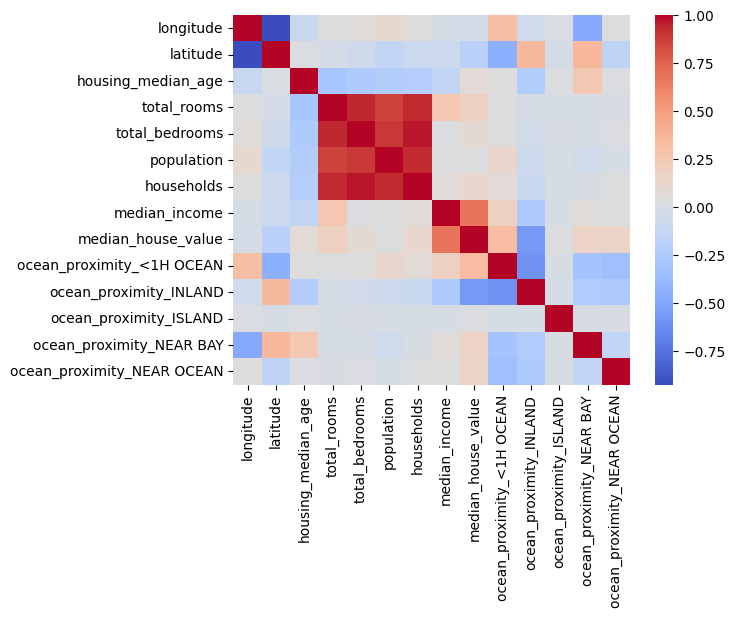

In [37]:
plt.Figure(figsize=(10,5))
corr=df.corr()
sns.heatmap(corr,cmap="coolwarm")


In [48]:
output_dir=Path.cwd().parent / "data" / "preprocessed"
os.makedirs(output_dir,exist_ok=True)
df.to_csv(output_dir/"post_eda_data.csv", index=False)